In [1]:
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
path ='SKIP_CNN_Q7/DB1/'

length of met files is 15

11 h 12 c
labels

In [3]:
labels=[]
for folders in os.listdir(path):
    if (len(folders)== 15):
        file1 = open(os.path.join(path,folders),"r+")  
        a=file1.readline()
        labels.append(a[12])
labels=np.array(labels)
labels

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], 
      dtype='<U1')

reading data

In [4]:
result=[]
folder='C001001_C40S2_dat'
file1 = open(os.path.join(path,folders),"r+")  
for x in file1.readlines():
            result.append(x.split('\t')[1])

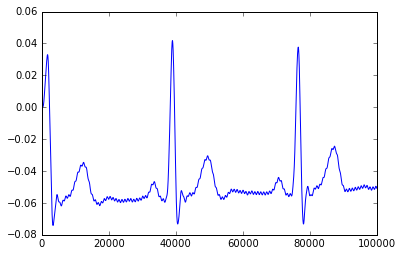

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(result[0:100000])
plt.show()

In [6]:
from scipy import signal

In [7]:
result=signal.resample(result,200)

In [8]:
result.shape

(200,)

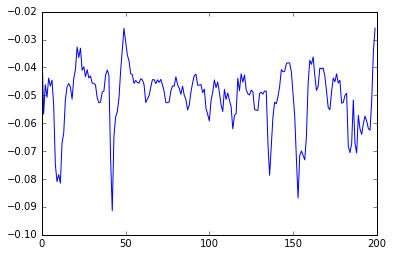

In [9]:
plt.plot(result)
plt.show()

all folders

In [ ]:
data=[]
for folders in os.listdir(path):
    if(os.path.splitext(folders)[0][-2]=='a'):
        file1 = open(os.path.join(path,folders),"r+")  
        result=[]
        for x in file1.readlines():
            result.append(x.split('\t')[1])
        result=signal.resample(result,200)
        data.append(result)
        file1.close()

In [ ]:
print(len(data))
print(len(data[0]))
print(len(labels))

In [ ]:
import pandas as pd
acdata=pd.DataFrame(data)
aclabels=pd.DataFrame(labels)

In [ ]:
aclabels


In [ ]:
acdata

In [ ]:
x_train=acdata.iloc[4:19,:]
y_train=aclabels.iloc[4:19,:]
x_test=acdata.iloc[0:4,:]
x_test.append(acdata.iloc[19:23,:])
y_test=aclabels.iloc[0:4,:]
y_test.append(aclabels.iloc[19:23,:])

In [ ]:
x_train

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
y_train1=LabelEncoder().fit_transform(y_train)
y_test1=LabelEncoder().fit_transform(y_test)
y_train=to_categorical(y_train1,2)
y_testcat=to_categorical(y_test1,2)

In [ ]:
print(y_train1.shape)
print(y_train.shape)
print(y_test1.shape)
print(y_testcat.shape)

In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv1D,Flatten,Dense,Input,MaxPool1D,Activation,Add,Softmax

In [209]:
inp=Input(shape=(200,1))
c=Conv1D(filters=32,kernel_size=5,padding='same')(inp)
c11=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(c)
a11=Activation('relu')(c11)
c12=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(a11)
s11=Add()([c12,c])
a12=Activation('relu')(s11)
m11=MaxPool1D(pool_size=5,strides=2)(a12)

c21=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(m11)
a21=Activation('relu')(c21)
c22=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(a21)
s21=Add()([c22,m11])
a22=Activation('relu')(s21)
m21=MaxPool1D(pool_size=5,strides=2)(a22)

c31=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(m21)
a31=Activation('relu')(c31)
c32=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(a31)
s31=Add()([c32,m21])
a32=Activation('relu')(s31)
m31=MaxPool1D(pool_size=5,strides=2)(a32)

c41=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(m31)
a41=Activation('relu')(c41)
c42=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(a41)
s41=Add()([c42,m31])
a42=Activation('relu')(s41)
m41=MaxPool1D(pool_size=5,strides=2)(a42)

c51=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(m41)
a51=Activation('relu')(c51)
c52=Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(a51)
s51=Add()([c52,m41])
a52=Activation('relu')(s51)
m51=MaxPool1D(pool_size=5,strides=2)(a52)

f1=Flatten()(m51)

d1=Dense(32)(f1)
a6=Activation('relu')(d1)
d2=Dense(32)(a6)
d3=Dense(2)(d2)
a7=Softmax()(d3)

model=Model(inputs=inp,outputs=a7)
    

model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 200, 1)       0                                            
__________________________________________________________________________________________________
conv1d_79 (Conv1D)              (None, 200, 32)      192         input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_80 (Conv1D)              (None, 200, 32)      5152        conv1d_79[0][0]                  
__________________________________________________________________________________________________
activation_74 (Activation)      (None, 200, 32)      0           conv1d_80[0][0]                  
__________________________________________________________________________________________________
conv1d_81 

In [217]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_testcat.shape)

(15, 200, 1)
(15, 2)
(4, 200, 1)
(4, 2)


In [211]:
x_train =np.array(x_train)
x_test =np.array(x_test)
x_train=np.reshape(x_train,(15,200,1))
x_test=np.reshape(x_test,(4,200,1))

In [212]:
print(x_train.shape)
print(x_test.shape)

(15, 200, 1)
(4, 200, 1)


In [218]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [219]:
model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=1)

Epoch 1/1
15/15 [==============================] - 1s 88ms/step - loss: 0.6937 - acc: 0.5333


In [220]:
model.evaluate(x_test,y_testcat)

4/4 [==============================] - 0s 34ms/step


[0.6955316066741943, 0.5]

In [221]:
y_pred=model.predict(x_test)

In [222]:
y_pred.shape

(4, 2)

In [223]:
y_predict=[]
for i in range(y_pred.shape[0]):
    y_predict.append(np.argmax(y_pred[i]))
y_predict=np.array(y_predict)
y_predict.shape  

(4,)

In [226]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score
accuracy=accuracy_score(y_test1,y_predict)
precision=precision_score(y_test1,y_predict, average=None)
recall=recall_score(y_test1,y_predict, average=None)
f1=f1_score(y_test1,y_predict, average=None)
print('Accuracy=',accuracy)
print('precision=',precision)
print('Recall=',recall)
print('f1_score=',f1)

Accuracy= 0.5
precision= [1. 0.]
Recall= [0.5 0. ]
f1_score= [0.66666667 0.        ]
